In [1]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [2]:
#pip install tensorflow_datasets

In [3]:
#!pip install --upgrade tensorflow-datasets

In [4]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()

In [5]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
train_dataset.element_spec

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [6]:
#pip install kaggle

In [7]:
#kaggle kernels output "tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model" -p F:/Sentiment


In [8]:
#for example,label in train_dataset.take(1):
   # print(label.numpy())
    #print(label.numpy())
    

In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [10]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [11]:
for example, label in train_dataset.take(1):
    print('texts: ', example.numpy()[:3])
    print()
    print('labels: ', label.numpy()[:3])

texts:  [b'On the day of the California Presidential Primary, between midnight and 1:00 AM, the spy Victor Rovner sends a message from Kuala Lumpur to USA. Meanwhile, in Los Angeles, the Federal Agent Jack Bauer has returned to his family and is having trouble at home with his teenage daughter Kimberly, who blames her mother Teri for putting Jack out of the house. Teri and Jack decide to have a serious conversation with Kim, and they discover that the girl has run away home. While trying to solve his domestic problem, Jack is called to his Counter Terrorist Unit by his colleague Nina Myers for a meeting with their chief Richard Walsh, who discloses a menace against the life of Senator David Palmer, who is running for president, and they need to find the shooter. Later, Walsh has a private conversation with Jack and tells that there is a conspiracy in the agency against David Palmer, and assigns Jack to find the conspirators. When an airplane explodes over the Mojave Desert, Jack has on

In [12]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [13]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [14]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[ 21,   2, 262, ...,   0,   0,   0],
       [  2, 742,   8, ...,   0,   0,   0],
       [ 56, 677,   3, ...,   0,   0,   0]])

In [15]:
for n in range(3):
    print("Original: ", example[n].numpy())
    print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
    print()

Original:  b'On the day of the California Presidential Primary, between midnight and 1:00 AM, the spy Victor Rovner sends a message from Kuala Lumpur to USA. Meanwhile, in Los Angeles, the Federal Agent Jack Bauer has returned to his family and is having trouble at home with his teenage daughter Kimberly, who blames her mother Teri for putting Jack out of the house. Teri and Jack decide to have a serious conversation with Kim, and they discover that the girl has run away home. While trying to solve his domestic problem, Jack is called to his Counter Terrorist Unit by his colleague Nina Myers for a meeting with their chief Richard Walsh, who discloses a menace against the life of Senator David Palmer, who is running for president, and they need to find the shooter. Later, Walsh has a private conversation with Jack and tells that there is a conspiracy in the agency against David Palmer, and assigns Jack to find the conspirators. When an airplane explodes over the Mojave Desert, Jack has 

In [16]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [17]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True, True, True]


In [18]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 10s 10s/step
[-0.00442302]


In [19]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

1/1 [==============================] - 0s 122ms/step
[-0.00442302]


In [20]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [21]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)


Epoch 1/10
391/391 [==============================] - 94s 187ms/step - loss: 0.6129 - accuracy: 0.6045 - val_loss: 0.4197 - val_accuracy: 0.8177
Epoch 2/10
391/391 [==============================] - 54s 138ms/step - loss: 0.3826 - accuracy: 0.8326 - val_loss: 0.3884 - val_accuracy: 0.8552
Epoch 3/10
391/391 [==============================] - 54s 137ms/step - loss: 0.3393 - accuracy: 0.8575 - val_loss: 0.3398 - val_accuracy: 0.8385
Epoch 4/10
391/391 [==============================] - 53s 136ms/step - loss: 0.3251 - accuracy: 0.8611 - val_loss: 0.3399 - val_accuracy: 0.8552
Epoch 5/10
391/391 [==============================] - 55s 139ms/step - loss: 0.3148 - accuracy: 0.8653 - val_loss: 0.3247 - val_accuracy: 0.8536
Epoch 6/10
391/391 [==============================] - 55s 139ms/step - loss: 0.3096 - accuracy: 0.8684 - val_loss: 0.3214 - val_accuracy: 0.8526
Epoch 7/10
391/391 [==============================] - 53s 135ms/step - loss: 0.3056 - accuracy: 0.8694 - val_loss: 0.3253 - val_ac

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
model.save('/content/drive/My Drive/Feedback_Modal/feedback_model') 

In [34]:
new_model = tf.keras.models.load_model('/content/drive/My Drive/Feedback_Modal/feedback_model')



In [35]:
new_model = tf.keras.models.load_model('/content/drive/My Drive/Feedback_Modal/feedback_model')
test_loss, test_acc = new_model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
# Check its architecture
new_model.summary()

391/391 [==============================] - 29s 60ms/step - loss: 0.3196 - accuracy: 0.8637
Test Loss: 0.3196459412574768
Test Accuracy: 0.8637199997901917
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                 

In [36]:
# predict on a sample text without padding.

sample_text = ('The wedding hall was very bad and the organizers were not professional.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

sample_text = ('The wedding hall was good but the overall event was exciting.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

if(predictions>(-0.4)):
  print("Good Review")

if(predictions<(-0.4)):
  print("Bad Review")


1/1 [==============================] - 5s 5s/step
[[-1.1046731]]
1/1 [==============================] - 0s 26ms/step
[[0.22910622]]
Good Review


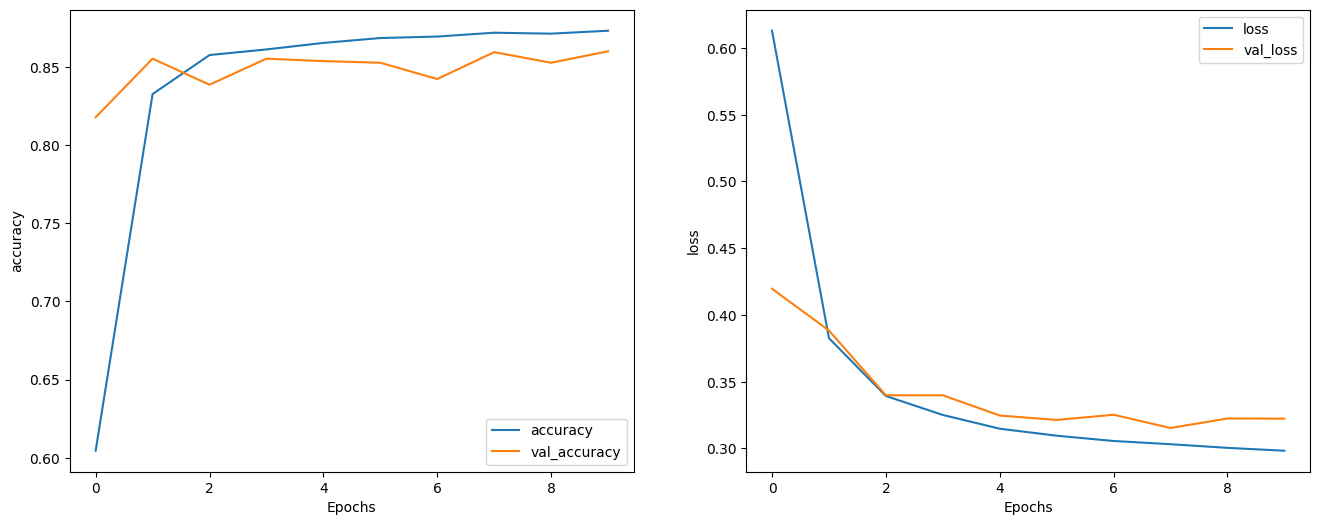

In [37]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')